# Statistical Hypothesis Testing for Players' Behaviour Data: Non-parametric Tests Examples

Utilizing some classic non-parametric tests, I will perform statistical analysis on two simulated datasets of a Computer Game Company (let's call it WSG) to support their strategy based on player behaviour.
* Dataset 1: *New feature.csv* records the number of daily active players. WSG implemented a new feature to their game, and we would like to know whether this new feature has attracted more players to stay online!
* Dataset 2: *Player hours.csv* records the player online hours. WSG developed a new game and opened the beta to a small number of players. How sticky are players with this game? 

In [53]:
knitr::opts_chunk$set(echo = TRUE)
knitr::opts_chunk$set(message = FALSE) 
knitr::opts_chunk$set(warning = FALSE) 

## Permutation Test Applications

In *New feature.csv*, two samples of the number of daily active players were taken. One sample of size 19 was taken from the data prior to implementing the new feature, which is shown in the column **Before**. Another sample of size 6 was taken from the data after implementing the new feature, which is shown in the column **After**.

Now we're interested in the question: does this new feature improve the number of daily active players? 

A permutation test may be a good choice given the small and uneven sample sizes.

In [55]:
library(exactRankTests)

In [56]:
feature <- read.csv('New feature.csv')

head(feature, 20)

,Before,After
,<int>,<int>
1,25,30
2,33,38
3,20,38
4,33,40
5,28,45
6,40,55
7,25,NA
8,38,NA
9,20,NA


In [57]:
perm.test(feature$Before,feature$After, paired =FALSE, alternative="less", mu=0,exact=TRUE)


	2-sample Permutation Test

data:  feature$Before and feature$After
T = 532, p-value = 0.0004912
alternative hypothesis: true mu is less than 0


Can we conclude that there is a positive change in the mean number of active daily players after implementing the new feature? YES!

The p-value is far less than 0.05, indicating a difference in the mean between **Before** and **After**. Sounds like players enjoyed this new feature!

## Bootstrapping Applications

In *Player hours.csv*, the online hours of 10 players are recorded in **Hours**.

Why is the sample size so small? Well, the beta of this new game only opens to a small number of players! 

Our parameter of interest is the median player's online hours--Is the median online hours more than 1.5 hours? Considering such a small sample size, bootstrapping might be a suitable test to figure out the question.

In [58]:
player <- read.csv('player hours.csv')
player

Hours
<dbl>
1.0
1.5
2.2
3.0
2.6
2.8
4.0
0.5
1.2


In [59]:
sd <- sd(player$Hours)
mean <- mean(player$Hours)
median <- median(player$Hours)

print(cbind(sd,mean,median))

           sd mean median
[1,] 1.060398  2.1    2.2


In [60]:
library(bootstrap)

[1] 2.127

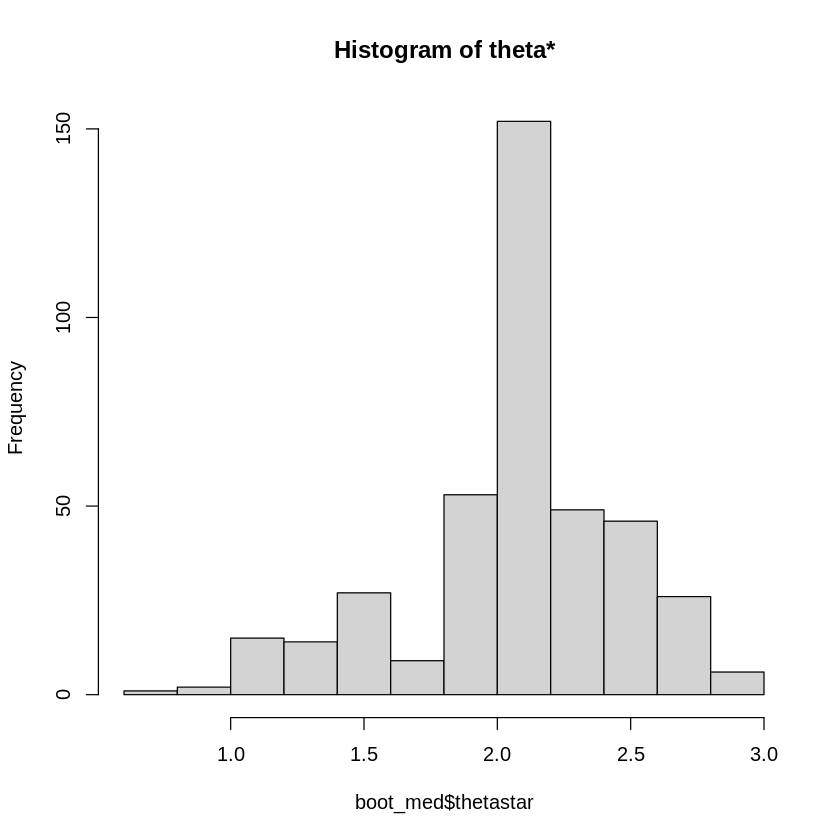

In [61]:
theta_med <- function(x){median(x)} 
boot_med <- bootstrap(player$Hours, 400, theta_med)
mean(boot_med$thetastar)
hist(boot_med$thetastar, main="Histogram of theta*")

[1] 0.70125

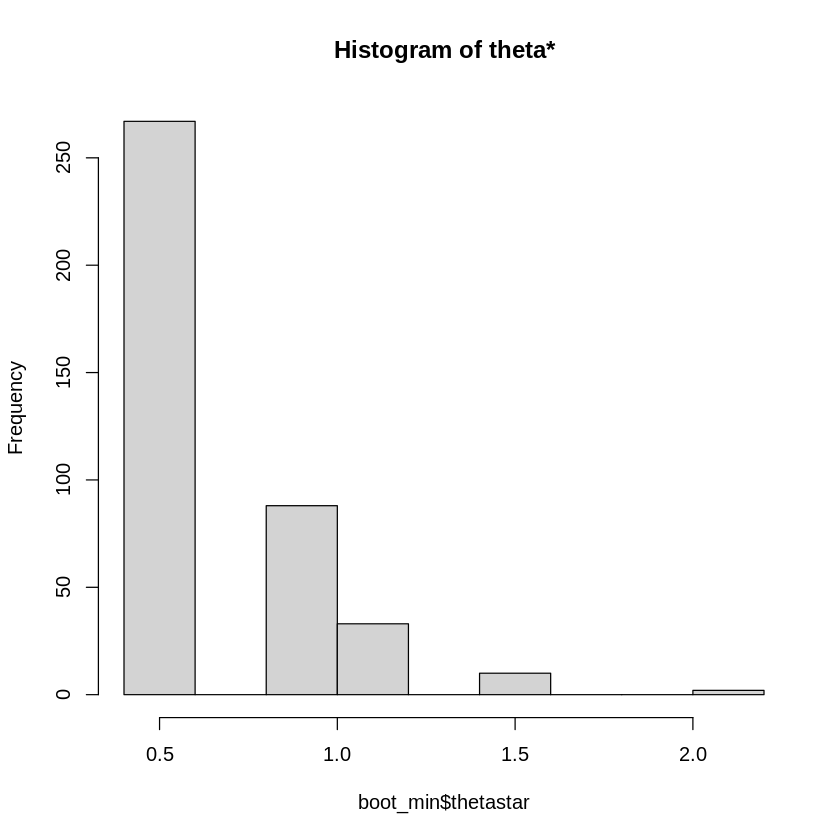

In [62]:
theta_min <- function(x){min(x)} 
boot_min <- bootstrap(player$Hours, 400, theta_min)
mean(boot_min$thetastar)
hist(boot_min$thetastar, main="Histogram of theta*")

Now we can test if the 95% confidence interval for median player online hours convers 1.5:

In [63]:
boot_medsort <- sort(boot_med$thetastar)
lb_med <- boot_medsort[400*0.025] # lower bound of 95% CI
ub_med <- boot_medsort[400*0.975] # upper bound of 95% CI

print(cbind(lb_med,ub_med))

     lb_med ub_med
[1,]    1.2    2.8


Unfortunately, the lower bound of the bootstrap confidence interval is 1.1 hours... :( We don't have enough evidence that the median online hours is more than 1.5 hours.

What about the minimum players online hours? Is it at least 30 minutes?

In [64]:
boot_minsort <- sort(boot_min$thetastar)
lb_min <- boot_minsort[400*0.025]
ub_min <- boot_minsort[400*0.975]

print(cbind(lb_min,ub_min))

     lb_min ub_min
[1,]    0.5    1.5


The bootstrap confidence interval indicates that the minimum player online hours is not likely to fall under 0.5 hour! We do have some evidence that players stay online for at least 30 minutes.